Import Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.offline import init_notebook_mode, iplot  
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

Read Data


In [28]:
data = pd.read_csv('data/train.csv')

Data Exploration and Analysis

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [30]:
data.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [31]:
data.duplicated().sum()


np.int64(0)

In [32]:
data.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [33]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

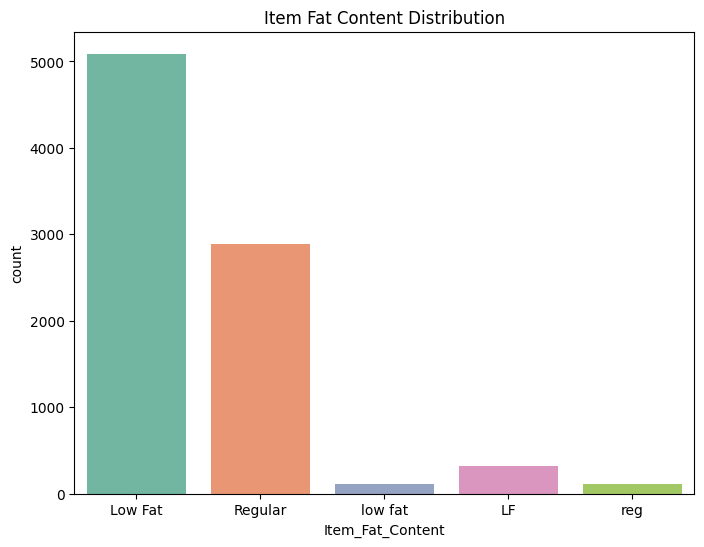

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Item_Fat_Content', palette='Set2')
plt.title('Item Fat Content Distribution')
plt.show()

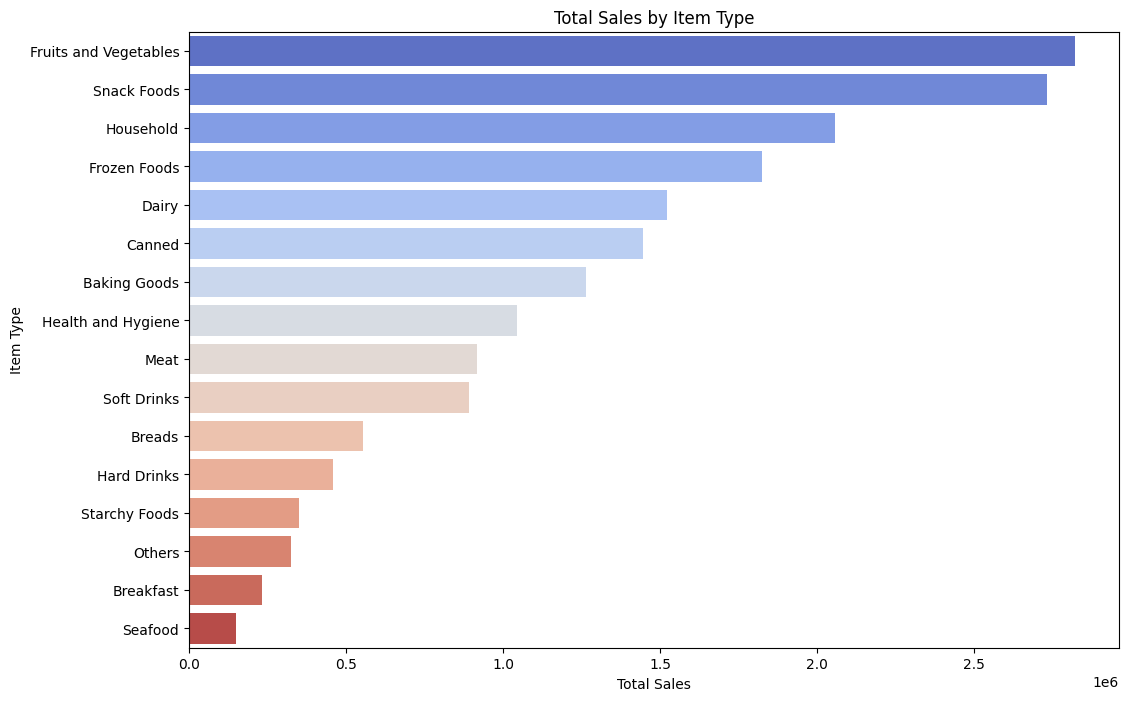

In [35]:
item_sales = data.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=item_sales.values, y=item_sales.index, palette='coolwarm')
plt.title('Total Sales by Item Type')
plt.xlabel('Total Sales')
plt.ylabel('Item Type')
plt.show()

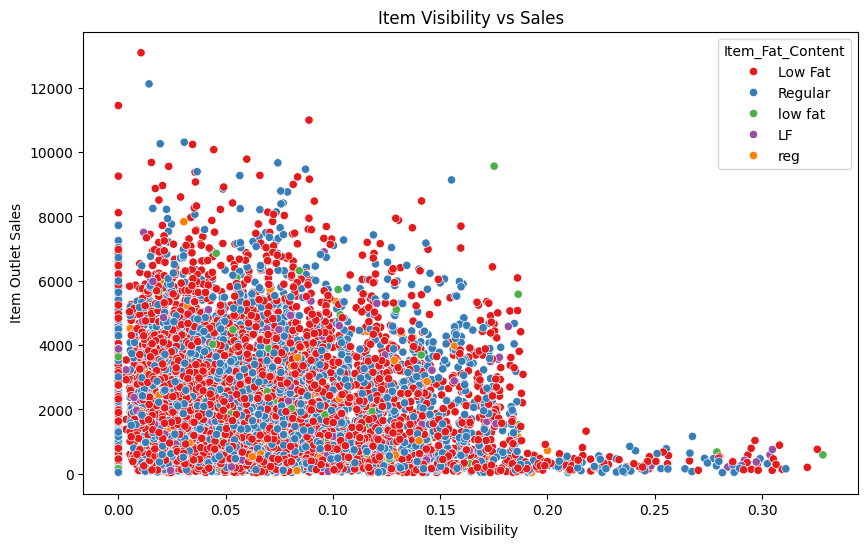

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Item_Visibility', y='Item_Outlet_Sales', hue='Item_Fat_Content', palette='Set1')
plt.title('Item Visibility vs Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

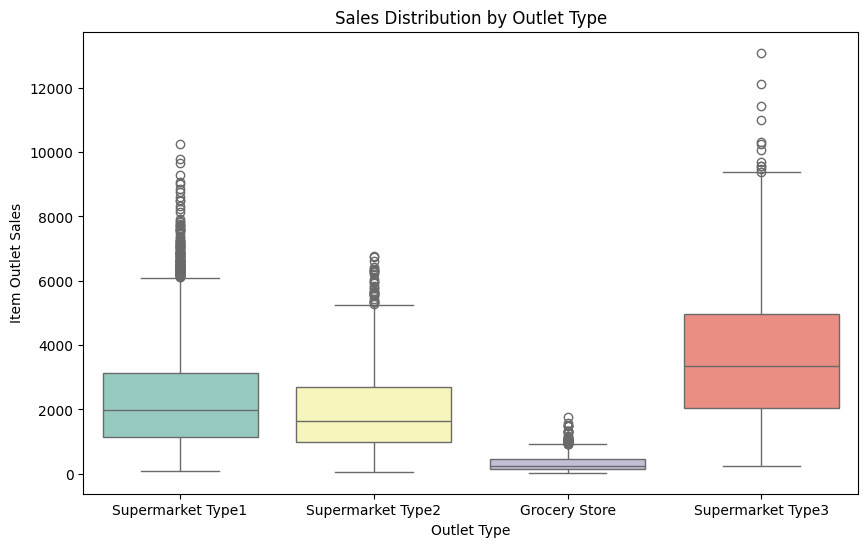

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', palette='Set3')
plt.title('Sales Distribution by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.show()

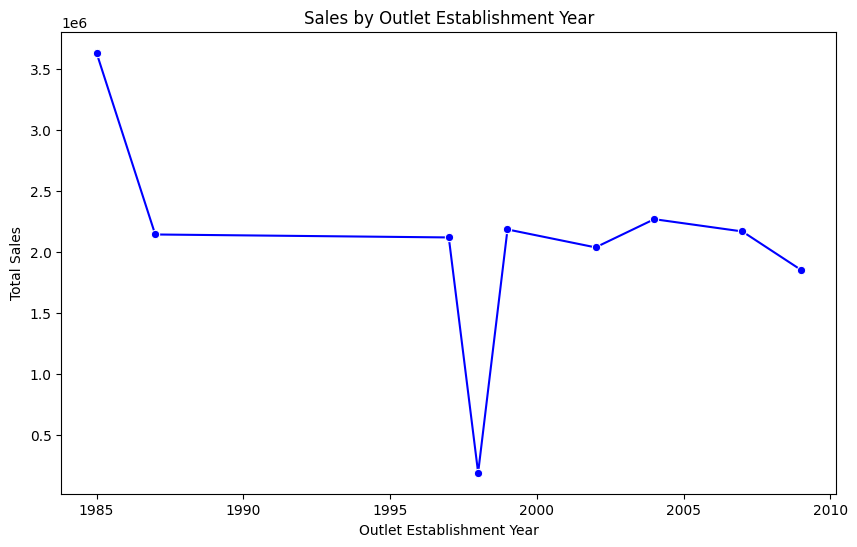

In [38]:
outlet_year_sales = data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=outlet_year_sales.index, y=outlet_year_sales.values, marker='o', color='b')
plt.title('Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.show()

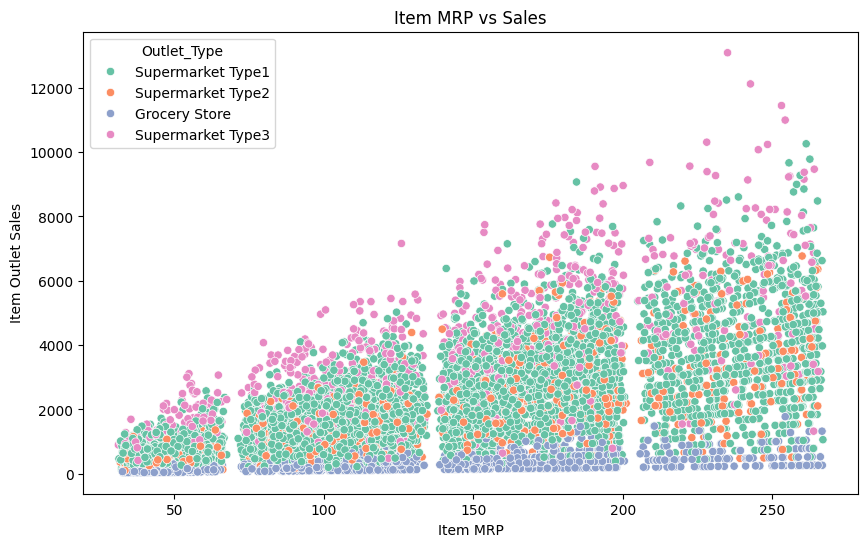

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Type', palette='Set2')
plt.title('Item MRP vs Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

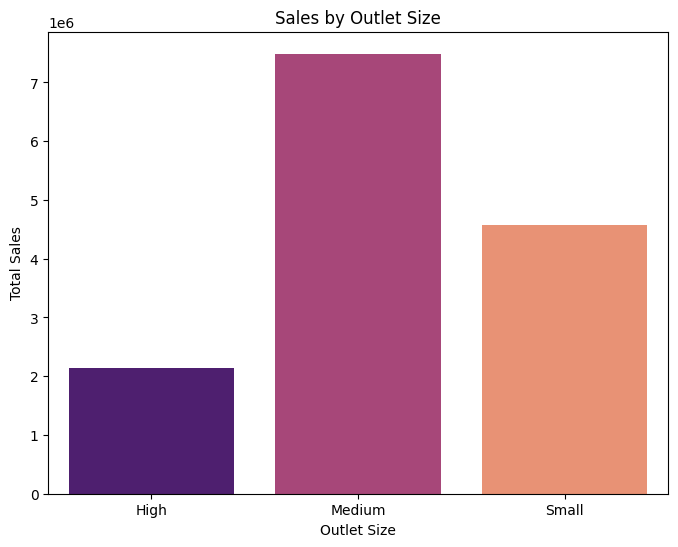

In [40]:
outlet_size_sales = data.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=outlet_size_sales.index, y=outlet_size_sales.values, palette='magma')
plt.title('Sales by Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Total Sales')
plt.show()

In [43]:
fig = px.bar(data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().reset_index(),
             x='Outlet_Location_Type', y='Item_Outlet_Sales',
             title="Sales by Outlet Location Type",
             labels={'Item_Outlet_Sales': 'Total Sales', 'Outlet_Location_Type': 'Location Type'},
             color='Outlet_Location_Type')

iplot(fig)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed